In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from store import *

In [3]:
store = Store(os.getenv('localappdata') + r'\Kaspad\kaspa-mainnet\datadir2')
# store.load_blocks()

In [4]:
fields = ['amount', 'pubkey_script', 'blockDaaScore', 'isCoinbase']
frames = store.load_utxo_data(fields=fields)

0it [00:00, ?it/s]

In [5]:
df = pd.DataFrame(frames).set_index('pubkey_script')

In [6]:
df_grouped = df.groupby('pubkey_script')

In [9]:
df_amounts = df_grouped['amount'].sum()

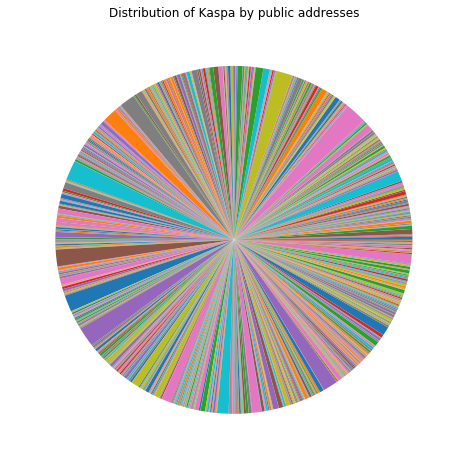

In [45]:
plt.figure(figsize=(8, 8))
plt.pie(df_amounts)
plt.title('Distribution of Kaspa by public addresses')
plt.show()

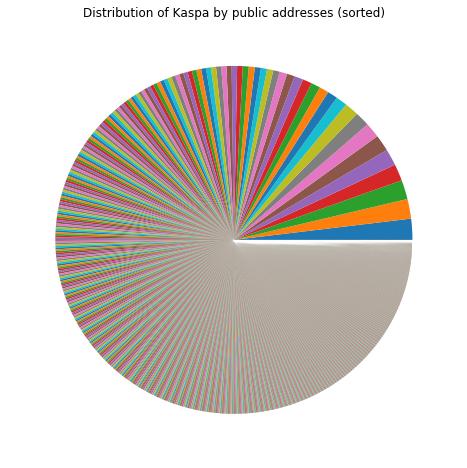

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(df_amounts.sort_values(ascending=False))
plt.title('Distribution of Kaspa by public addresses (sorted)')
plt.show()

In [43]:
top_100_kas_holders = df_amounts.sort_values(ascending=False)[:100]
total_kas = sum(df_amounts)
print('Top 100 KAS holders hold\t{:.2f}% of the total supply {}'.format(
    (100*sum(top_100_kas_holders))/total_kas, total_kas//100_000_000))
print('Top 10 KAS holders hold\t\t{:.2f}% of the total supply {}'.format(
    (100*sum(top_100_kas_holders[:10]))/total_kas, total_kas//100_000_000))
print('Top KAS holder holds\t\t{:.2f}% of the total supply {}'.format(
    (100*top_100_kas_holders.iloc[0])/total_kas, total_kas//100_000_000))

Top 100 KAS holders hold	45.71% of the total supply 3933628044
Top 10 KAS holders hold		15.22% of the total supply 3933628044
Top KAS holder holds		1.95% of the total supply 3933628044


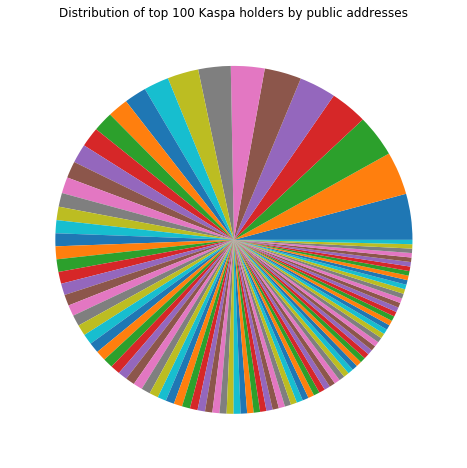

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(top_100_kas_holders)
plt.title('Distribution of top 100 Kaspa holders by public addresses')
plt.show()

In [19]:
# len(df_grouped)
# len(df_amounts)
# df_amounts.sort_values(ascending=False)[:100]

In [7]:
# store.close()